###  Reads the CSV file into a Pandas DataFrame named 'df'

In [1]:
import pandas as pd
file = r"C:\Users\pinis\Downloads\podcastdata_dataset.csv"
df = pd.read_csv(file)
df= df.sample(frac=0.1, random_state=42)
df.head(20)

,id,guest,title,text
73,73,Andrew Ng,"Deep Learning, Education, and Real-World AI",The following is a conversation with Andrew Ng...
218,220,Niels Jorgensen,New York Firefighters and the Heroes of 9/11,The following is a conversation with Niels Jor...
25,25,Jeff Hawkins,Thousand Brains Theory of Intelligence,The following is a conversation with Jeff Hawk...
208,210,Matt Walker,Sleep,The following is a conversation with Matt Walk...
9,10,Pieter Abbeel,Deep Reinforcement Learning,The following is a conversation with Peter Abb...
101,102,Steven Pressfield,The War of Art,The following is a conversation with Stephen P...
176,177,Risto Miikkulainen,Neuroevolution and Evolutionary Computation,The following is a conversation with Risto Mic...
186,187,Frank Wilczek,"Physics of Quarks, Dark Matter, Complexity, Li...",The following is a conversation with Frank Wil...
63,63,Stephen Kotkin,"Stalin, Putin, and the Nature of Power",The following is a conversation with Stephen K...
116,117,Sheldon Solomon,Death and Meaning,The following is a conversation with Sheldon S...


### Downloading the stopwords from NLTK (Natural Language Toolkit) and printing the stopwords for the English language

In [2]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'some', 'ours', 'it', 'both', 'under', "mightn't", 'from', 'my', "it's", 'your', 'there', 'on', 'she', "wasn't", 'did', 'same', 'while', 'can', "didn't", 'few', 'too', "weren't", 'nor', 'before', 'd', 's', 'being', 'hers', 'me', 'those', 'him', 'should', 've', 'how', 'wouldn', 'of', 'because', 'a', 'that', "you've", 'wasn', 'll', 'shan', 'were', "couldn't", 'myself', 'ma', 'ain', 'aren', 'hadn', 'will', 'yourself', 'ourselves', 'again', 'or', 'so', 'y', "shan't", 'once', 'own', 'most', 'down', 'was', 'and', 'is', 'does', "she's", "mustn't", 'yourselves', 'the', 'through', 'having', 'here', "hadn't", 'hasn', 'isn', 'mightn', "haven't", 'had', 'for', 'where', "isn't", "you'll", 'into', 'during', 'yours', 'why', 'such', 'weren', 'not', 'doing', 'm', 'theirs', "you're", 'then', 'if', 'over', 'they', 'have', 'only', "wouldn't", 'until', 'further', 'as', 'this', 'he', 'has', 'his', "should've", "don't", 'between', 'which', 'our', 'their', 'now', 'in', 'what', 'by', 'been', 'them', "needn't"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pinis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Building a text preprocessing pipeline using regular expressions

In [3]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

### The prepare function defined applies a preprocessing pipeline to each text in the 'text' column of the DataFrame df

In [4]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

### Calculates the frequency of each token in the 'tokens' column of the DataFrame df

In [5]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name ='token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
like,5726
think,4033
know,3287
people,2705
one,2301
yeah,2181
things,1798
right,1720
really,1698


### Generates a word cloud visualization based on the frequency of tokens in the DataFrame freq_df

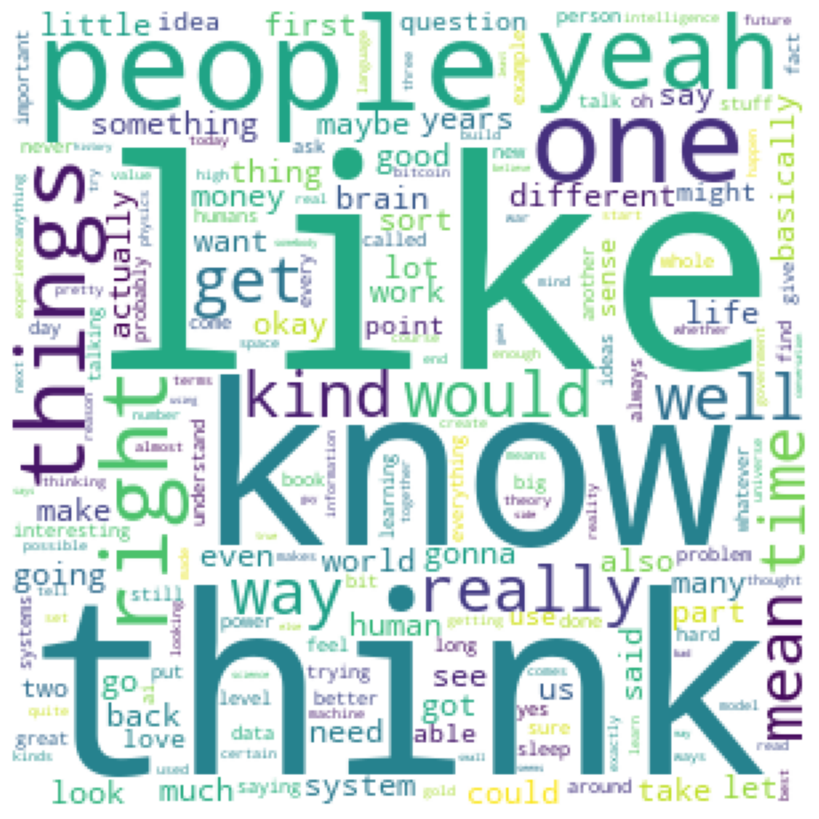

In [6]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### calculates the Inverse Document Frequency (IDF) for tokens in a DataFrame using function compute_idf

In [7]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

### Calculating the TF-IDF values for the tokens in dataset

In [8]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
like,5726,572.6
think,4033,403.3
know,3287,328.7
people,2705,270.5
one,2301,230.1


### word cloud visualization based on the TF-IDF values calculated for each token

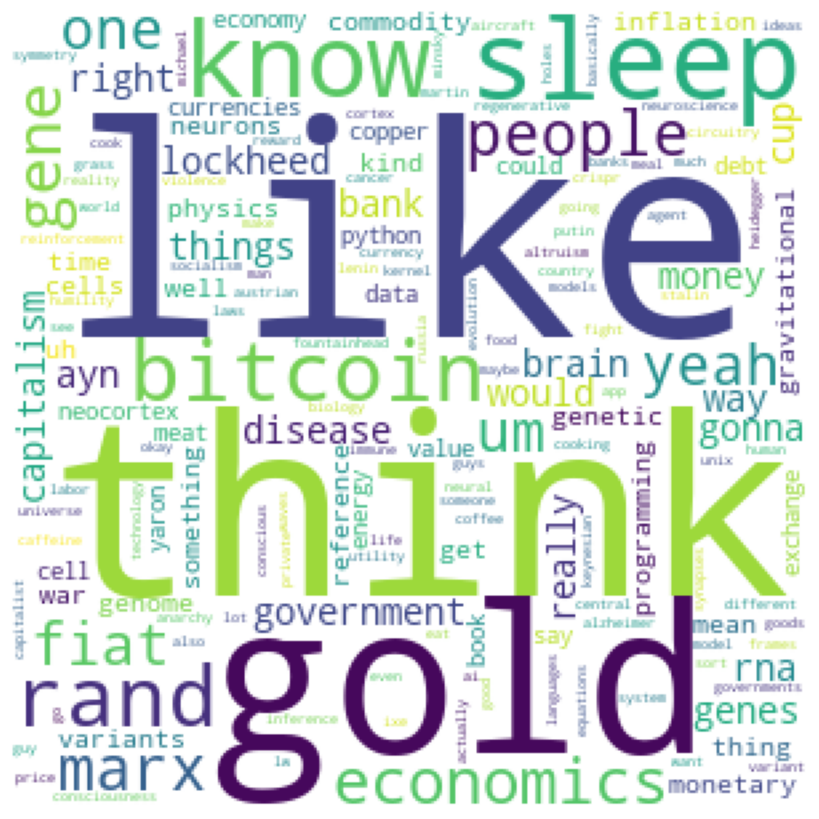

In [9]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### counts the occurrences of specific keywords within a list of tokens

In [10]:
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [11]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

### creating a heatmap using Seaborn to visualize the relative frequencies of specific keywords

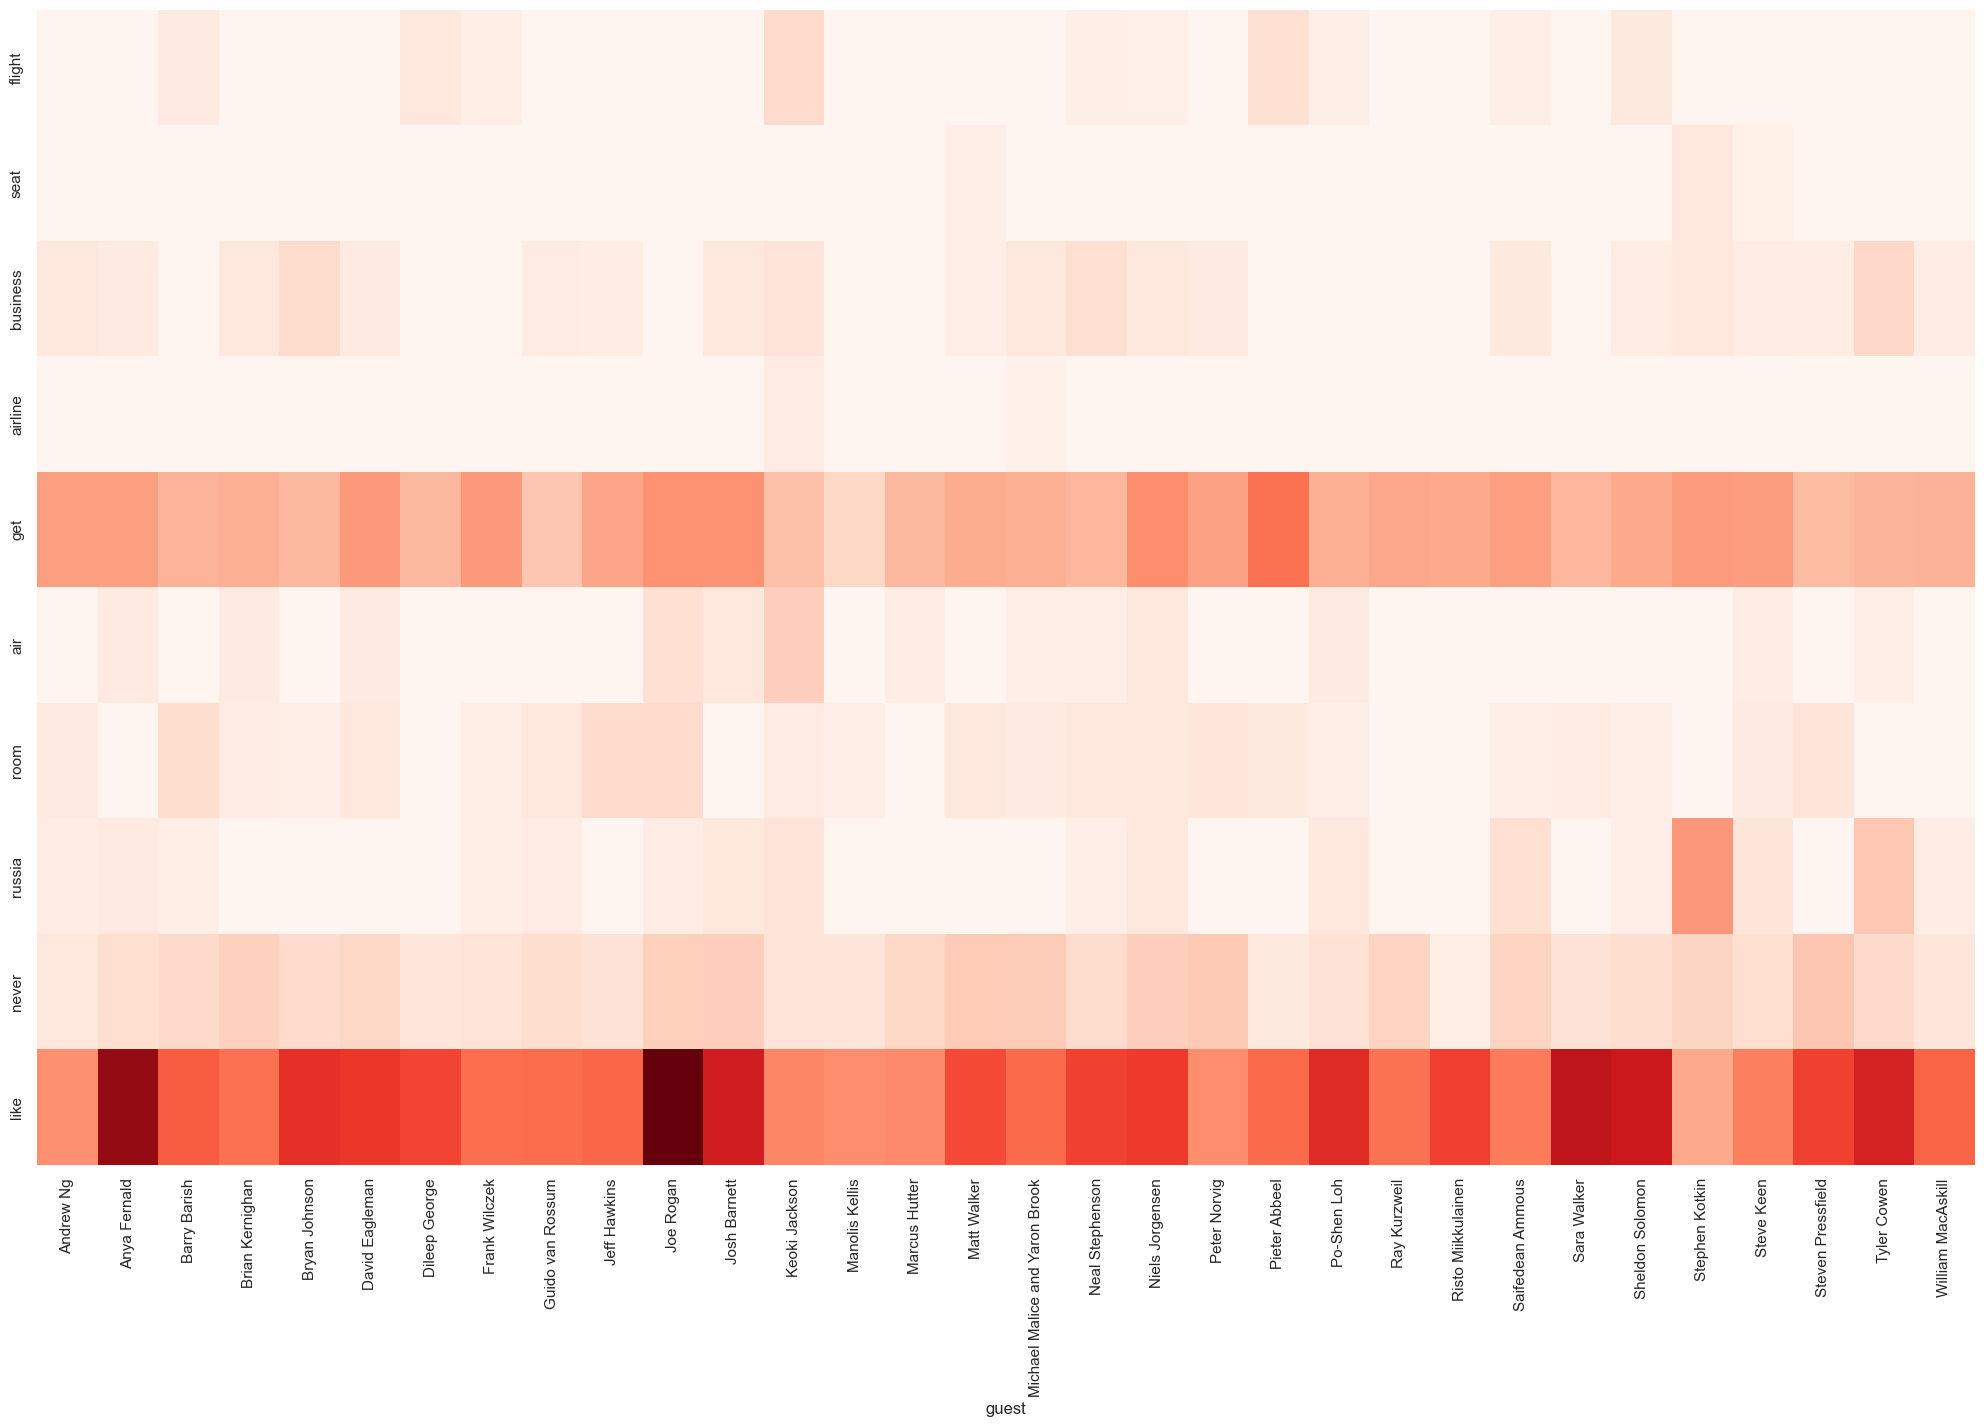

In [12]:
import seaborn as sns
keywords = ['flight', 'seat','business', 'airline', 'get', 
            'air', 'room','russia', 'never','like']  
freq_df = count_keywords_by(df, by='guest', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('guest')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(25, 15)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)